In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#install tensorflow
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
#install saeborn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
#import of tensorflow and seaborn - check version of tf
import tensorflow as tf
print(tf.__version__)
import seaborn as sns

2021-08-04 15:36:42.163986: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /mnt/c/Users/User/Geant4/geant4_10_04_p01-install/lib:/home/nicolaubuntu/root_6.22.00_built/lib
2021-08-04 15:36:42.164437: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.5.0


In [5]:
#read dataset
dataset=pd.read_csv("patient-20201204-172212.csv")
dataset

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-01
4,1,2,2,2,44,2,1,2,2,2,2,2,2,2,2,2,2,2,2,9999-99-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95834,2,2,2,2,59,97,2,2,2,2,2,2,2,2,2,2,99,3,2,9999-99-99
95835,2,2,2,2,50,97,1,2,2,1,1,2,2,2,1,2,99,3,2,9999-99-99
95836,1,2,2,2,65,2,2,2,2,2,1,2,2,2,2,2,99,3,2,9999-99-99
95837,1,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,1,3,97,9999-99-99


In [6]:
#delete output !=  1 
dt = dataset[dataset["outcome"] == 1]
dt["outcome"].unique()
dt

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99
3,2,2,2,2,57,97,1,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-01
9,2,1,97,2,55,97,1,2,1,2,1,2,2,1,2,2,99,1,97,9999-99-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,2,2,2,1,66,97,2,2,2,2,2,2,2,2,2,2,2,1,1,9999-99-99
95645,1,2,2,2,60,2,2,2,2,2,1,2,2,2,2,2,1,1,2,9999-99-99
95657,2,2,2,2,56,97,1,2,2,2,1,2,2,2,2,2,1,1,2,9999-99-99
95693,1,1,97,2,48,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99


In [7]:
#make new dummy: death = 1 not death = 0
dt["isdeath"]=dt["death_date"].map({'9999-99-99': 0})
dt["isdeath"] = dt["isdeath"].replace(np.nan, 1)
dt['isdeath'].dtype
dt

/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,...,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date,isdeath
0,2,1,97,2,42,97,2,2,1,2,...,2,2,2,2,2,99,1,97,9999-99-99,0.0
1,1,1,97,2,51,2,2,2,2,2,...,2,2,2,2,2,99,1,97,9999-99-99,0.0
2,2,2,2,2,51,97,1,2,2,2,...,2,2,1,2,2,99,1,2,9999-99-99,0.0
3,2,2,2,2,57,97,1,2,2,2,...,2,2,2,2,2,99,1,2,2020-04-01,1.0
9,2,1,97,2,55,97,1,2,1,2,...,2,2,1,2,2,99,1,97,9999-99-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,2,2,2,1,66,97,2,2,2,2,...,2,2,2,2,2,2,1,1,9999-99-99,0.0
95645,1,2,2,2,60,2,2,2,2,2,...,2,2,2,2,2,1,1,2,9999-99-99,0.0
95657,2,2,2,2,56,97,1,2,2,2,...,2,2,2,2,2,1,1,2,9999-99-99,0.0
95693,1,1,97,2,48,2,2,2,2,2,...,2,2,2,2,2,99,1,97,9999-99-99,0.0


In [8]:
#working with intubated variable, change and delete data not available
#frequency of variable.value_count 1 intubeted yes, 2 no
dt['intubated'].value_counts()
dt.loc[dt['intubated']>2,'intubated']=2 #all numbers greater than 3 becomes 2 so their value is no
#change dummy value -- 0 not intubated, 1 intubated
dt['intubated']=dt['intubated'].map({2: 0,1: 1})
dt['intubated'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    22480
1      991
Name: intubated, dtype: int64

In [9]:
#working with copd variable, change and delete data not available
#frequency of variable.value_count 1 yes copd problems, 2 no problems
dt['copd'].value_counts()
dt.loc[dt['copd']>2,'copd']=2 #all numbers greater than 3 becomes 2 so their value is no
#change dummy variable -- 0 not copd, 1 copd
dt['copd']=dt['copd'].map({2: 0,1: 1})
dt['copd'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    22893
1      578
Name: copd, dtype: int64

In [10]:
#working with diabetic variable 
#There are not available values, change to not diabetic
#frequency of variable.value_count 1 diabetes, 2 not diabetes
dt['diabetes'].value_counts()
dt.loc[dt['diabetes']>2,'diabetes']=2
#change dummy variable -- 1 diabetes, 0 not diabetes
dt['diabetes']= dt['diabetes'].map({2:0,1:1})
dt['diabetes'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    19123
1     4348
Name: diabetes, dtype: int64

In [11]:
#working with pneumonia variable. 1 not pneumonia 2 pneumonia
dt.loc[dt['pneumonia']>2,'pneumonia']=2
#change dummy variable -- 1 not pneumonia, 0 pneumonia
dt['pneumonia']=dt['pneumonia'].map({2: 0,1: 1})
dt['pneumonia'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0    16590
1     6881
Name: pneumonia, dtype: int64

In [12]:
#working with asthma
#Now 1 asthma , 2 not asthma
dt.loc[dt['asthma']>2,'asthma']=2
#change dummy variable -- 1 asthma, 0 not asthma
dt['asthma']=dt['asthma'].map({2: 0,1: 1})
dt['asthma'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    22690
1      781
Name: asthma, dtype: int64

In [13]:
#working with obesity
#Now 1 obesity , 2 non obesity
dt.loc[dt['obesity']>2,'obesity']=2
#change dummy variable --  1 obesity, 0 not obesity
dt['obesity']=dt['obesity'].map({2: 0,1: 1})
dt['obesity'].value_counts()

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    18531
1     4940
Name: obesity, dtype: int64

In [14]:
#working with smoker
#Now 1 smoker , 2 not smoker
dt.loc[dt['smoker']>2,'smoker']=2
#change dummy variable -- 1 smoker, 0 not smoker 
dt['smoker']=dt['smoker'].map({2: 0,1: 1})

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
#working with sex
#Now 1 woman, 2 man
#change dummy variable -- 0 woman, 1 man
dt['sex']=dt['sex'].map({2:1,1:0})

/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [16]:
#working with immunosuppression
#Now 1 immunosuppression , 2 not immunosuppression
dt['immunosuppression'].value_counts()
dt.loc[dt['immunosuppression']>2, 'immunosuppression']=2
#change dummy variable -- 0 not immunosuppression, 1 immunosuppression
dt['immunosuppression']=dt['immunosuppression'].map({2:0,1:1})

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
#working with hypertension
#Now 1 hypertension, 2 not hypertension
dt['hypertension'].value_counts()
dt.loc[dt['hypertension']>2, 'hypertension']=2
#change dummy variable -- 0 not immunosuppression, 1 immunosuppression
dt['hypertension']=dt['hypertension'].map({2:0,1:1})

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#working with cardiovascular
#Now 1 cardiovascular, 2 not cardiovascular
dt['cardiovascular'].value_counts()
dt.loc[dt['cardiovascular']>2, 'cardiovascular']=2
#change dummy variable -- 0 not cardiovascular, 1 cardiovascular
dt['cardiovascular']=dt['cardiovascular'].map({2:0,1:1})

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#working with icu (intensive care unit)
#Now 1 icu , 2 not icu
dt['icu'].value_counts()
dt.loc[dt['icu']>2, 'icu']=2
#change dummy variable -- 0 not icu, 1 icu
dt['icu']=dt['icu'].map({2:0,1:1})

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#working with chronic_kidney_failure
#Now 1 yes, 2 no
dt['chronic_kidney_failure'].value_counts()
dt.loc[dt['chronic_kidney_failure']>2, 'chronic_kidney_failure']=2
#change dummy variable -- 0 no, 1 yes
dt['chronic_kidney_failure']=dt['chronic_kidney_failure'].map({2:0,1:1})

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/nicolaubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#reset dataframe index to reshape dataframe due to deleted rows.
dt.reset_index(drop=True)

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,...,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date,isdeath
0,1,1,0,0,42,97,0,0,1,0,...,2,0,0,0,0,99,1,0,9999-99-99,0.0
1,0,1,0,0,51,2,0,0,0,0,...,2,0,0,0,0,99,1,0,9999-99-99,0.0
2,1,2,0,0,51,97,1,0,0,0,...,2,0,1,0,0,99,1,0,9999-99-99,0.0
3,1,2,0,0,57,97,1,0,0,0,...,2,0,0,0,0,99,1,0,2020-04-01,1.0
4,1,1,0,0,55,97,1,0,1,0,...,2,0,1,0,0,99,1,0,9999-99-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23466,1,2,0,1,66,97,0,0,0,0,...,2,0,0,0,0,2,1,1,9999-99-99,0.0
23467,0,2,0,0,60,2,0,0,0,0,...,2,0,0,0,0,1,1,0,9999-99-99,0.0
23468,1,2,0,0,56,97,1,0,0,0,...,2,0,0,0,0,1,1,0,9999-99-99,0.0
23469,0,1,0,0,48,2,0,0,0,0,...,2,0,0,0,0,99,1,0,9999-99-99,0.0


In [22]:
#drop variable with less or null information
dt1=pd.DataFrame(dt)
dt1=dt1.drop("pregnant",axis=1)
dt1=dt1.drop("outcome",axis=1)
dt1=dt1.drop("death_date",axis=1)
dt1=dt1.drop("patient_type",axis=1)
dt1=dt1.drop("other_diseases",axis=1)
dt1=dt1.drop("another_case",axis=1)
dt1.astype('int64').dtypes
dt1

,sex,intubated,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,chronic_kidney_failure,smoker,icu,isdeath
0,1,0,0,42,0,0,1,0,0,0,0,0,0,0,0.0
1,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0.0
2,1,0,0,51,1,0,0,0,1,0,1,0,0,0,0.0
3,1,0,0,57,1,0,0,0,0,0,0,0,0,0,1.0
9,1,0,0,55,1,0,1,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,1,0,1,66,0,0,0,0,0,0,0,0,0,1,0.0
95645,0,0,0,60,0,0,0,0,1,0,0,0,0,0,0.0
95657,1,0,0,56,1,0,0,0,1,0,0,0,0,0,0.0
95693,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0.0


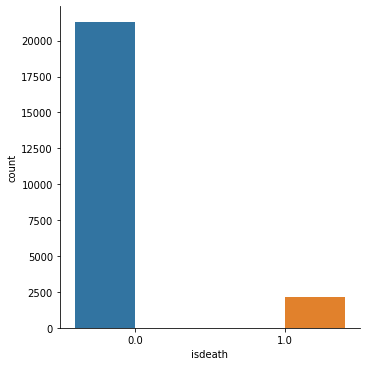

In [23]:
#see how many death there are
fig=sns.catplot(x="isdeath", hue="isdeath", kind="count", data=dt1)

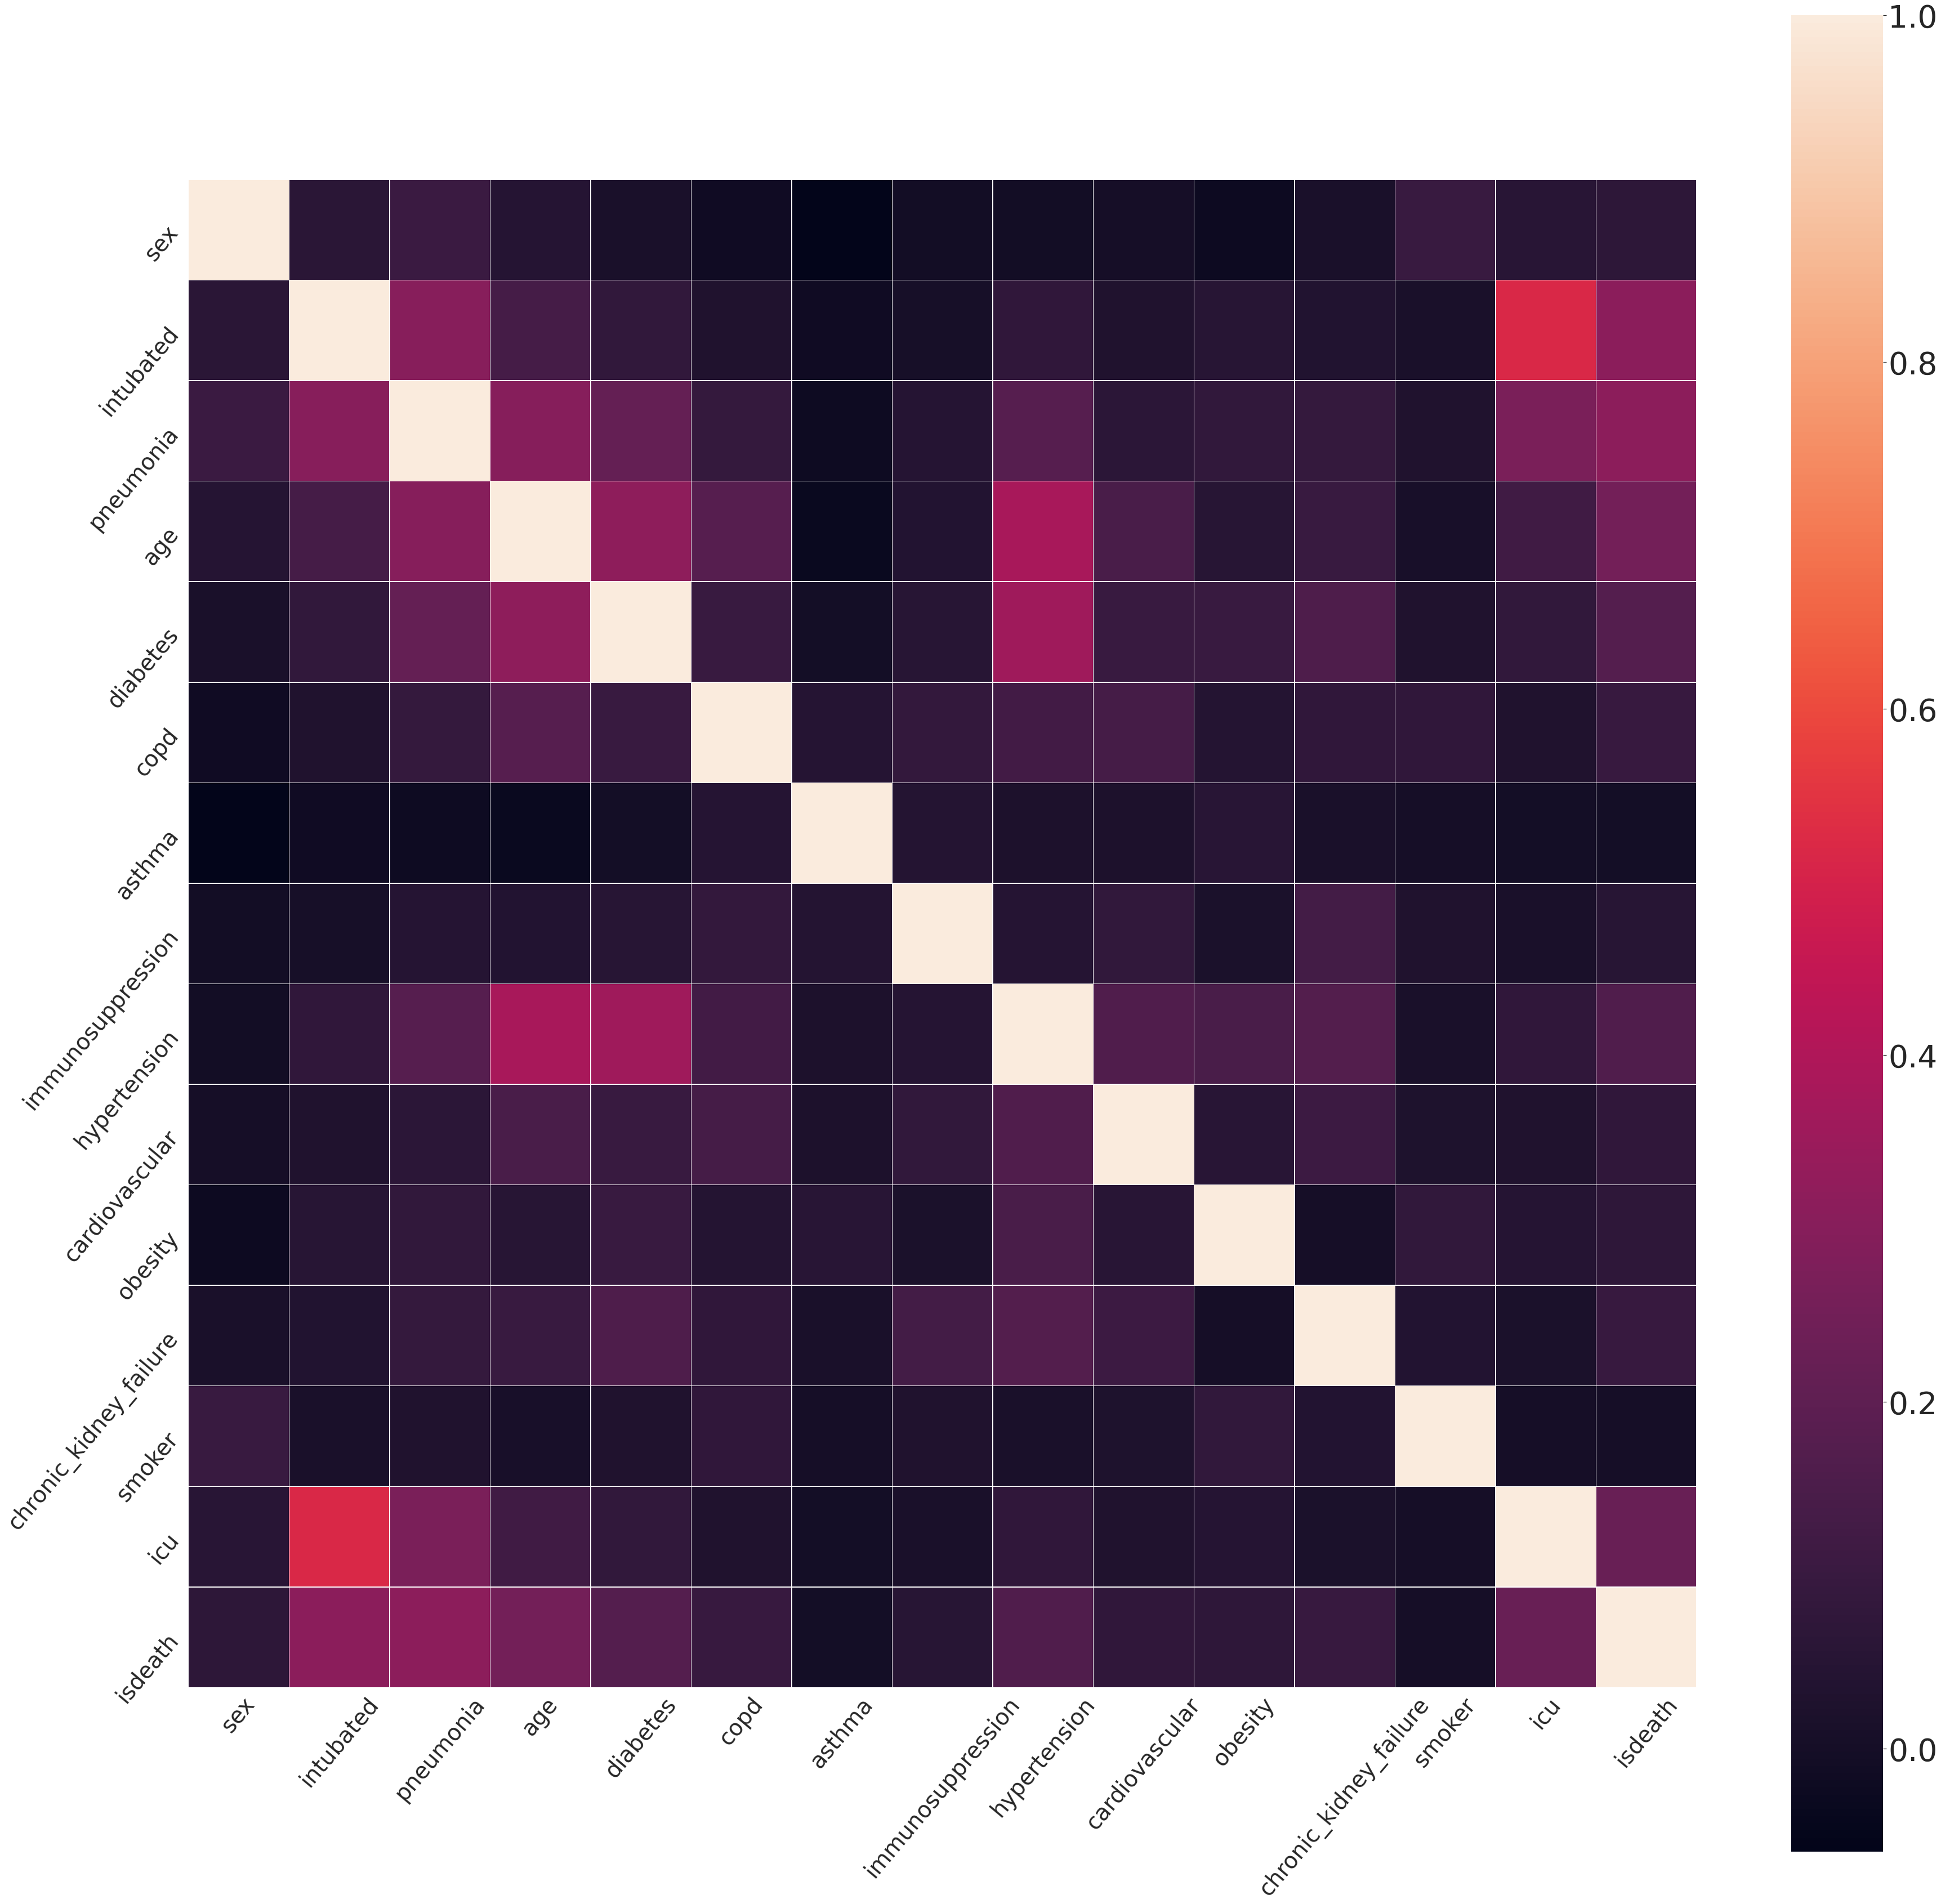

In [25]:
#show correlations between variables
corrMatrix = pd.DataFrame.corr(dt1)
sns.heatmap(corrMatrix,square=True,linewidths=.5)
plt.rcParams["figure.figsize"] = (60,60)
plt.xticks(fontsize = 40,rotation=50)
plt.yticks(fontsize = 40,rotation=50)
sns.set(font_scale=6)
plt.show()

In [26]:
#check that there aren't nan values
dt1.isna()
dt1.isna().sum()

sex                       0
intubated                 0
pneumonia                 0
age                       0
diabetes                  0
copd                      0
asthma                    0
immunosuppression         0
hypertension              0
cardiovascular            0
obesity                   0
chronic_kidney_failure    0
smoker                    0
icu                       0
isdeath                   0
dtype: int64

In [27]:
#preprocessing
from sklearn import preprocessing
labe = preprocessing.LabelEncoder()
dt1['isdeath'] = labe.fit_transform(dt1['isdeath'])

In [28]:
#return array
dt1['sex'].unique()
dt1['intubated'].unique()
dt1['pneumonia'].unique()
dt1['diabetes'].unique()
dt1['copd'].unique()
dt1['asthma'].unique()
dt1['immunosuppression'].unique()
dt1['hypertension'].unique()
dt1['cardiovascular'].unique()
dt1['obesity'].unique()
dt1['chronic_kidney_failure'].unique()
dt1['smoker'].unique()
dt1['icu'].unique()
dt1['isdeath'].unique()
dt1

,sex,intubated,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,chronic_kidney_failure,smoker,icu,isdeath
0,1,0,0,42,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,51,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,51,1,0,0,0,1,0,1,0,0,0,0
3,1,0,0,57,1,0,0,0,0,0,0,0,0,0,1
9,1,0,0,55,1,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95599,1,0,1,66,0,0,0,0,0,0,0,0,0,1,0
95645,0,0,0,60,0,0,0,0,1,0,0,0,0,0,0
95657,1,0,0,56,1,0,0,0,1,0,0,0,0,0,0
95693,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#make training and test samples
x = dt1.drop(['isdeath'],axis=1)
y = dt1['isdeath']

from sklearn.model_selection import train_test_split
xtrain, xtest,ytrain,ytest = train_test_split(x, y, test_size = 0.20, random_state = 50)

In [30]:
#shape of samples
xtrain=xtrain.reset_index(drop=True)
ytrain=ytrain.reset_index(drop=True)
ytrain.shape[0]

18776

In [31]:
#balancing dataset, delete variables with target 0, in order to have uniform distribution of values 
#make a loop deleting all rows in dataset that are more than target equal 1

num_one_target = int(np.sum(ytrain))
zero_target_count = 0
indicies_toremove = []

#loop
for i in range (ytrain.shape[0]): 
   if ytrain[i]== 0:
       zero_target_count+= 1
       if zero_target_count>num_one_target:
          indicies_toremove.append(i)

indicies_toremove=np.array(indicies_toremove)

In [32]:
xtrain = xtrain.drop(indicies_toremove, axis=0)
ytrain = ytrain.drop(indicies_toremove, axis=0)

In [33]:
ytrain

0        0
1        0
2        1
3        0
4        0
        ..
18747    1
18751    1
18763    1
18769    1
18773    1
Name: isdeath, Length: 3490, dtype: int64

In [34]:
xtrain

,sex,intubated,pneumonia,age,diabetes,copd,asthma,immunosuppression,hypertension,cardiovascular,obesity,chronic_kidney_failure,smoker,icu
0,0,0,0,39,0,0,0,0,0,0,0,0,0,0
1,0,0,1,77,0,0,0,1,0,0,0,0,0,1
2,1,0,1,47,0,0,0,0,1,0,0,1,1,0
3,1,1,1,34,0,0,0,0,0,0,0,0,0,0
4,0,0,0,69,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,1,0,1,58,0,0,0,0,0,0,0,0,0,0
18751,1,0,0,59,0,0,0,0,0,0,0,0,1,1
18763,1,1,1,51,0,0,0,0,0,0,0,1,0,1
18769,1,0,0,78,0,0,0,0,0,0,0,0,0,0


In [35]:
#age scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain.iloc[:,3]=sc.fit_transform(np.reshape(np.array(xtrain.iloc[:,3]),(-1,1)))
xtest.iloc[:,3]=sc.transform(np.reshape(np.array(xtest.iloc[:,3]),(-1,1)))
xtest.iloc[:,3]

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


41349   -0.423241
74142    1.292547
80074    0.495932
11816    0.128263
50789   -1.403691
           ...   
70200   -0.300684
52091   -1.526247
58690   -0.300684
54275    0.618488
65249   -0.729631
Name: age, Length: 4695, dtype: float64

In [36]:
#import cross_val_score function
from sklearn.model_selection import cross_val_score

In [37]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini', max_depth=4, max_features='sqrt', n_estimators=100)

#training
rfc.fit(xtrain, ytrain)
ypred=rfc.predict(xtest)

#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(ytest, ypred))
acc_rmfor=accuracy_score(ytest, ypred)
print(acc_rmfor)

#cross validation
accuracies_rmf=cross_val_score(estimator=rfc, X=xtrain, y=ytrain, cv=10)
accuracies_cross_val_randomforest=accuracies_rmf.mean()*100
print("Accuracy rmf: {:2f} %".format(accuracies_rmf.mean()*100)) #accuracies mean calculated before
print("Standard deviation: {:2f} %".format(accuracies_rmf.std()*100)) #accuracies standard deviation calculated before

[[3181 1105]
 [  95  314]]
0.744408945686901
Accuracy rmf: 77.851003 %
Standard deviation: 1.700230 %


In [38]:
#NAIVE BAYESIAN
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)
y_predby=classifier.predict(xtest)
cm = confusion_matrix(ytest, y_predby)
acc_naive=accuracy_score(ytest, y_predby)
acc_naive
print(cm)
print(accuracy_score(ytest, y_predby))
accuracies=cross_val_score(estimator=classifier, X=xtrain, y=ytrain, cv=10)
accuracies_cross_val_naive=accuracies.mean()*100
print("Accuracy: {:2f} %".format(accuracies.mean()*100))
print("Standard deviation: {:2f} %".format(accuracies.std()*100))

[[3747  539]
 [ 217  192]]
0.8389776357827476
Accuracy: 68.538682 %
Standard deviation: 2.154911 %


In [39]:
#Make xtrain ytrain and validation
xtrainsize=xtrain.shape[0]
xtrainsize=int(xtrainsize*0.8)
xtrainann=xtrain.iloc[:xtrainsize]
ytrainann=xtrain[:xtrainsize]
validationtrain=xtrain[xtrainsize:]
validationtargets=ytrain[xtrainsize:]

In [40]:
#import function for early stopping in order to prevent overfitting
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [41]:
#NEURAL NETWORK

num_units=xtrain.shape[0]
hidden_layer_size=6
output_size=2
ann=tf.keras.models.Sequential([
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
])
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
batch_size=10
numepoch=150
ann.fit(xtrain,ytrain,
        batch_size=batch_size,
        epochs=numepoch,
        callbacks=[early_stopping],
        validation_data=(validationtrain,validationtargets),verbose=2
        )

2021-08-04 15:38:56.195883: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /mnt/c/Users/User/Geant4/geant4_10_04_p01-install/lib:/home/nicolaubuntu/root_6.22.00_built/lib
2021-08-04 15:38:56.196334: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-04 15:38:56.196746: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Pc-User): /proc/driver/nvidia/version does not exist
2021-08-04 15:38:56.359271: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-04 15:38:56.361524: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1801000000 Hz


Epoch 1/150
349/349 - 2s - loss: 0.5966 - accuracy: 0.7020 - val_loss: 0.4557 - val_accuracy: 0.7822
Epoch 2/150
349/349 - 1s - loss: 0.4822 - accuracy: 0.7756 - val_loss: 0.4416 - val_accuracy: 0.8166
Epoch 3/150
349/349 - 1s - loss: 0.4623 - accuracy: 0.7857 - val_loss: 0.4316 - val_accuracy: 0.8309
Epoch 4/150
349/349 - 1s - loss: 0.4558 - accuracy: 0.7880 - val_loss: 0.4132 - val_accuracy: 0.8381
Epoch 5/150
349/349 - 1s - loss: 0.4534 - accuracy: 0.7894 - val_loss: 0.3753 - val_accuracy: 0.8582
Epoch 6/150
349/349 - 1s - loss: 0.4520 - accuracy: 0.7905 - val_loss: 0.4002 - val_accuracy: 0.8524
Epoch 7/150
349/349 - 1s - loss: 0.4500 - accuracy: 0.7885 - val_loss: 0.4006 - val_accuracy: 0.8524
Epoch 8/150
349/349 - 1s - loss: 0.4495 - accuracy: 0.7865 - val_loss: 0.4090 - val_accuracy: 0.8481


In [42]:
test_model,test_accuracy=ann.evaluate(xtest,ytest)

147/147 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7289


In [43]:
#predictions are array with two raws per element, every elements has probability of one of two classes
#round predictions in order to make them with one value per row, because it's needed to confront them
y_pred_ann = ann.predict(xtest)
rounded_predictions=np.argmax(y_pred_ann, axis=-1)
print(confusion_matrix(ytest, rounded_predictions))
acc_ann=accuracy_score(ytest, rounded_predictions)
acc_ann

[[3093 1193]
 [  80  329]]


0.7288604898828541

In [44]:
y_pred_ann = ann.predict(xtest)
y_pred_ann

array([[0.8868113 , 0.11318868],
       [0.17349887, 0.82650113],
       [0.2719929 , 0.7280071 ],
       ...,
       [0.72857475, 0.27142525],
       [0.7005517 , 0.29944825],
       [0.9202303 , 0.07976973]], dtype=float32)

In [45]:
#K-NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(xtrain, ytrain)
ypred_knn = knn.predict(xtest)
print(confusion_matrix(ytest, ypred_knn))
acc_knn=accuracy_score(ytest, ypred_knn)
acc_knn

[[3248 1038]
 [ 106  303]]


0.7563365282215122

In [46]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=0.025, probability = True)
svm.fit(xtrain, ytrain)

ypred_svm = svm.predict(xtest)
ypred_svm
ypred_svm = svm.predict(xtest)
print(confusion_matrix(ytest, ypred_svm))
accsvm=accuracy_score(ytest, ypred_svm)
accsvm

[[2922 1364]
 [  75  334]]


0.693503727369542

In [47]:
#DECISION TREE
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(xtrain, ytrain)
ypred_clf = clf.predict(xtest)
print(confusion_matrix(ytest, ypred_clf))
accdectree=accuracy_score(ytest, ypred_clf)
accdectree

[[3246 1040]
 [ 147  262]]


0.7471778487752929

In [48]:
#ADABOOST DT
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(xtrain, ytrain)
ypred_ada = ada.predict(xtest)
print(confusion_matrix(ytest, ypred_ada))
acc_adaboost=accuracy_score(ytest, ypred_ada)
acc_adaboost

[[3320  966]
 [ 109  300]]


0.7710330138445154

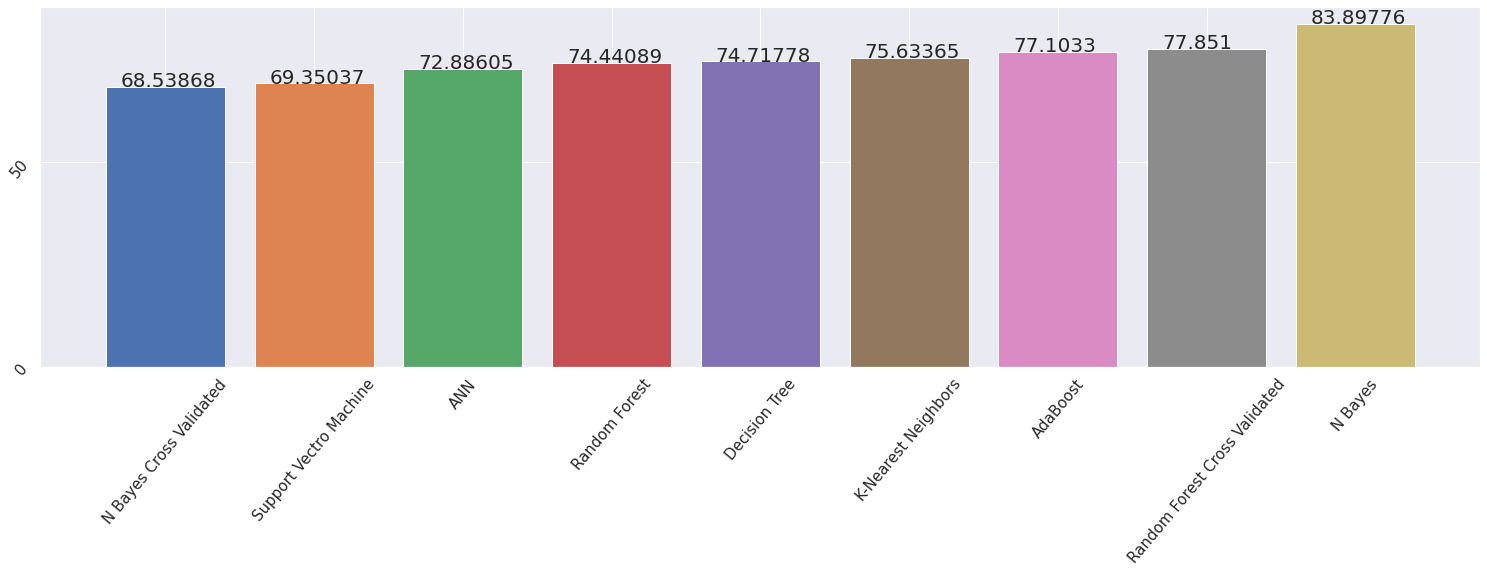

In [49]:
models=['Decision Tree','Random Forest','Random Forest Cross Validated','N Bayes', 'N Bayes Cross Validated', 'K-Nearest Neighbors','Support Vectro Machine', 'AdaBoost', 'ANN']
accuracy=[accdectree,acc_rmfor,accuracies_cross_val_randomforest,acc_naive,accuracies_cross_val_naive, acc_knn, accsvm,acc_adaboost,acc_ann]
accuracy
d = {'Models': models, 'accuracy': accuracy}
acc_frame = pd.DataFrame(data=d)

#boxplot algorithm comparison
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
acc_frame.loc[acc_frame['accuracy']<1,'accuracy']=acc_frame['accuracy']*100
acc_frame=acc_frame.sort_values(by=['accuracy'])

#draw bar plot
ax.bar(acc_frame['Models'],acc_frame['accuracy'],color=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8'])
plt.gcf().set_size_inches(20, 5)
plt.xticks(fontsize = 15,rotation=50)
plt.yticks(fontsize = 15,rotation=50)#acc_frame

for index, value in enumerate(acc_frame['accuracy']):
    plt.text(index -0.3,value, str(round(value,5)),fontsize=20)
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
accuracies=cross_val_score(estimator=knn, X=xtrain, y=ytrain, cv=10)
print(accuracies)
print("Accuracy: {:2f} %".format(accuracies.mean()*100)) #accuracies mean calculated before
print("Standard deviation: {:2f} %".format(accuracies.std()*100)) #accuracies standard deviation calculated before

[0.76790831 0.80802292 0.77363897 0.75071633 0.77936963 0.74498567
 0.78223496 0.75644699 0.79083095 0.77077364]
Accuracy: 77.249284 %
Standard deviation: 1.804020 %


In [52]:
!pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [53]:
y_probas = np.array(classifier.predict_proba(xtest))
print(y_probas[::,0])

[0.99921532 0.27579666 0.92868516 ... 0.99775834 0.99764989 0.99944982]


In [54]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

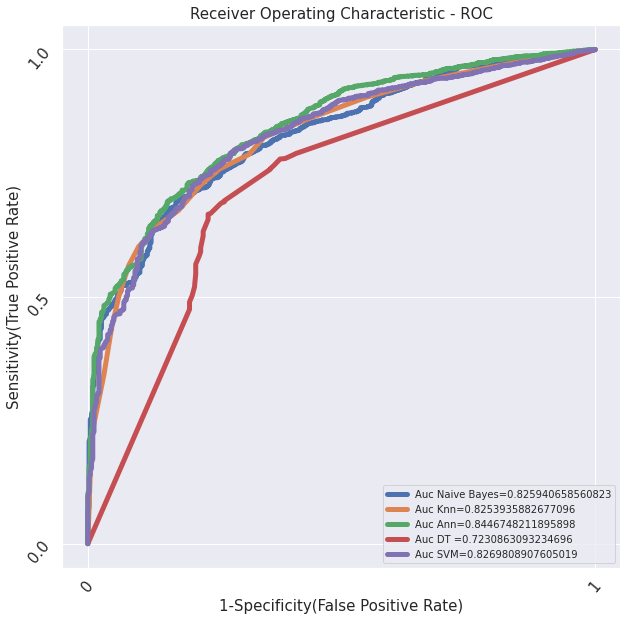

In [55]:
#ROC curves

y_probas_nb = np.array(classifier.predict_proba(xtest))
fpr, tpr, thresholds = metrics.roc_curve(np.array(ytest), y_probas_nb[::,0], pos_label=0)

y_probasknn = np.array(knn.predict_proba(xtest))
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(np.array(ytest), y_probasknn[::,0], pos_label=0)

y_pred_ann
fpr_ann, tpr_ann, thresholds_ann = metrics.roc_curve(np.array(ytest), y_pred_ann[::,0], pos_label=0)

y_proba_clf=clf.predict_proba(xtest)
fpr_clf, tpr_clf, thresholds_clf = metrics.roc_curve(np.array(ytest), y_proba_clf[::,0], pos_label=0)

y_proba_svm=svm.predict_proba(xtest)
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(np.array(ytest), y_proba_svm[::,0], pos_label=0)


auc_nb = metrics.roc_auc_score(ytest, y_probas[::,1])
auc_knn = metrics.roc_auc_score(ytest, y_probasknn[::,1])
auc_ann = metrics.roc_auc_score(ytest, y_pred_ann[::,1])
auc_clf = metrics.roc_auc_score(ytest, y_proba_clf[::,1])
auc_svm = metrics.roc_auc_score(ytest, y_proba_svm[::,1])

plt.plot(fpr,tpr,label="Auc Naive Bayes="+str(auc_nb),linewidth=5)
plt.plot(fpr_knn,tpr_knn,label="Auc Knn="+str(auc_knn), linewidth=5)
plt.plot(fpr_ann,tpr_ann,label="Auc Ann="+str(auc_ann), linewidth=5)
plt.plot(fpr_clf,tpr_clf,label="Auc DT ="+str(auc_clf), linewidth=5)
plt.plot(fpr_svm,tpr_svm,label="Auc SVM="+str(auc_svm), linewidth=5)


plt.xlabel('1-Specificity(False Positive Rate)',fontsize=15)
plt.ylabel('Sensitivity(True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic - ROC',fontsize=15)
plt.legend(loc="lower right", fontsize=10)
plt.gcf().set_size_inches(10, 10)
plt.xticks(fontsize = 15,rotation=50)
plt.yticks(fontsize = 15,rotation=50)
plt.show()